# Car Price Prediction


In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 4 : Deriving new features (Các tính năng mới)

In [12]:
# Tiết kiệm nhiên liệu
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [13]:
# Phân loại công ty dựa trên giá của từng công ty
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin = ['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


### Step 5 : Bivariate Analysis (Phân tích lưỡng biến)

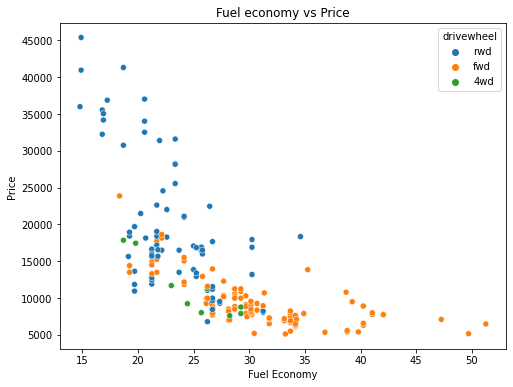

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x = cars['fueleconomy'], y = cars['price'], hue = cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

#### Inference :

1. `fueleconomy` has an obvios `negative correlation` with price and is significant.

`fueleconomy` có `mối tương quan nghịch` rõ ràng với giá cả và điều này rất quan trọng.

<Figure size 1800x432 with 0 Axes>

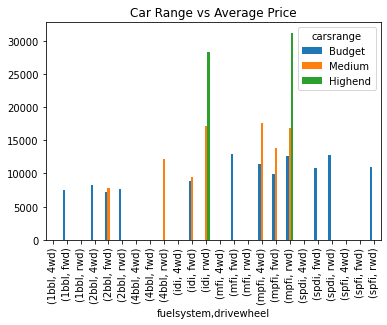

In [15]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

#### Inference :

1. High ranged cars prefer `rwd` drivewheel with `idi` or `mpfi` fuelsystem.



### List of significant variables after Visual analysis :

    - Car Range 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [16]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


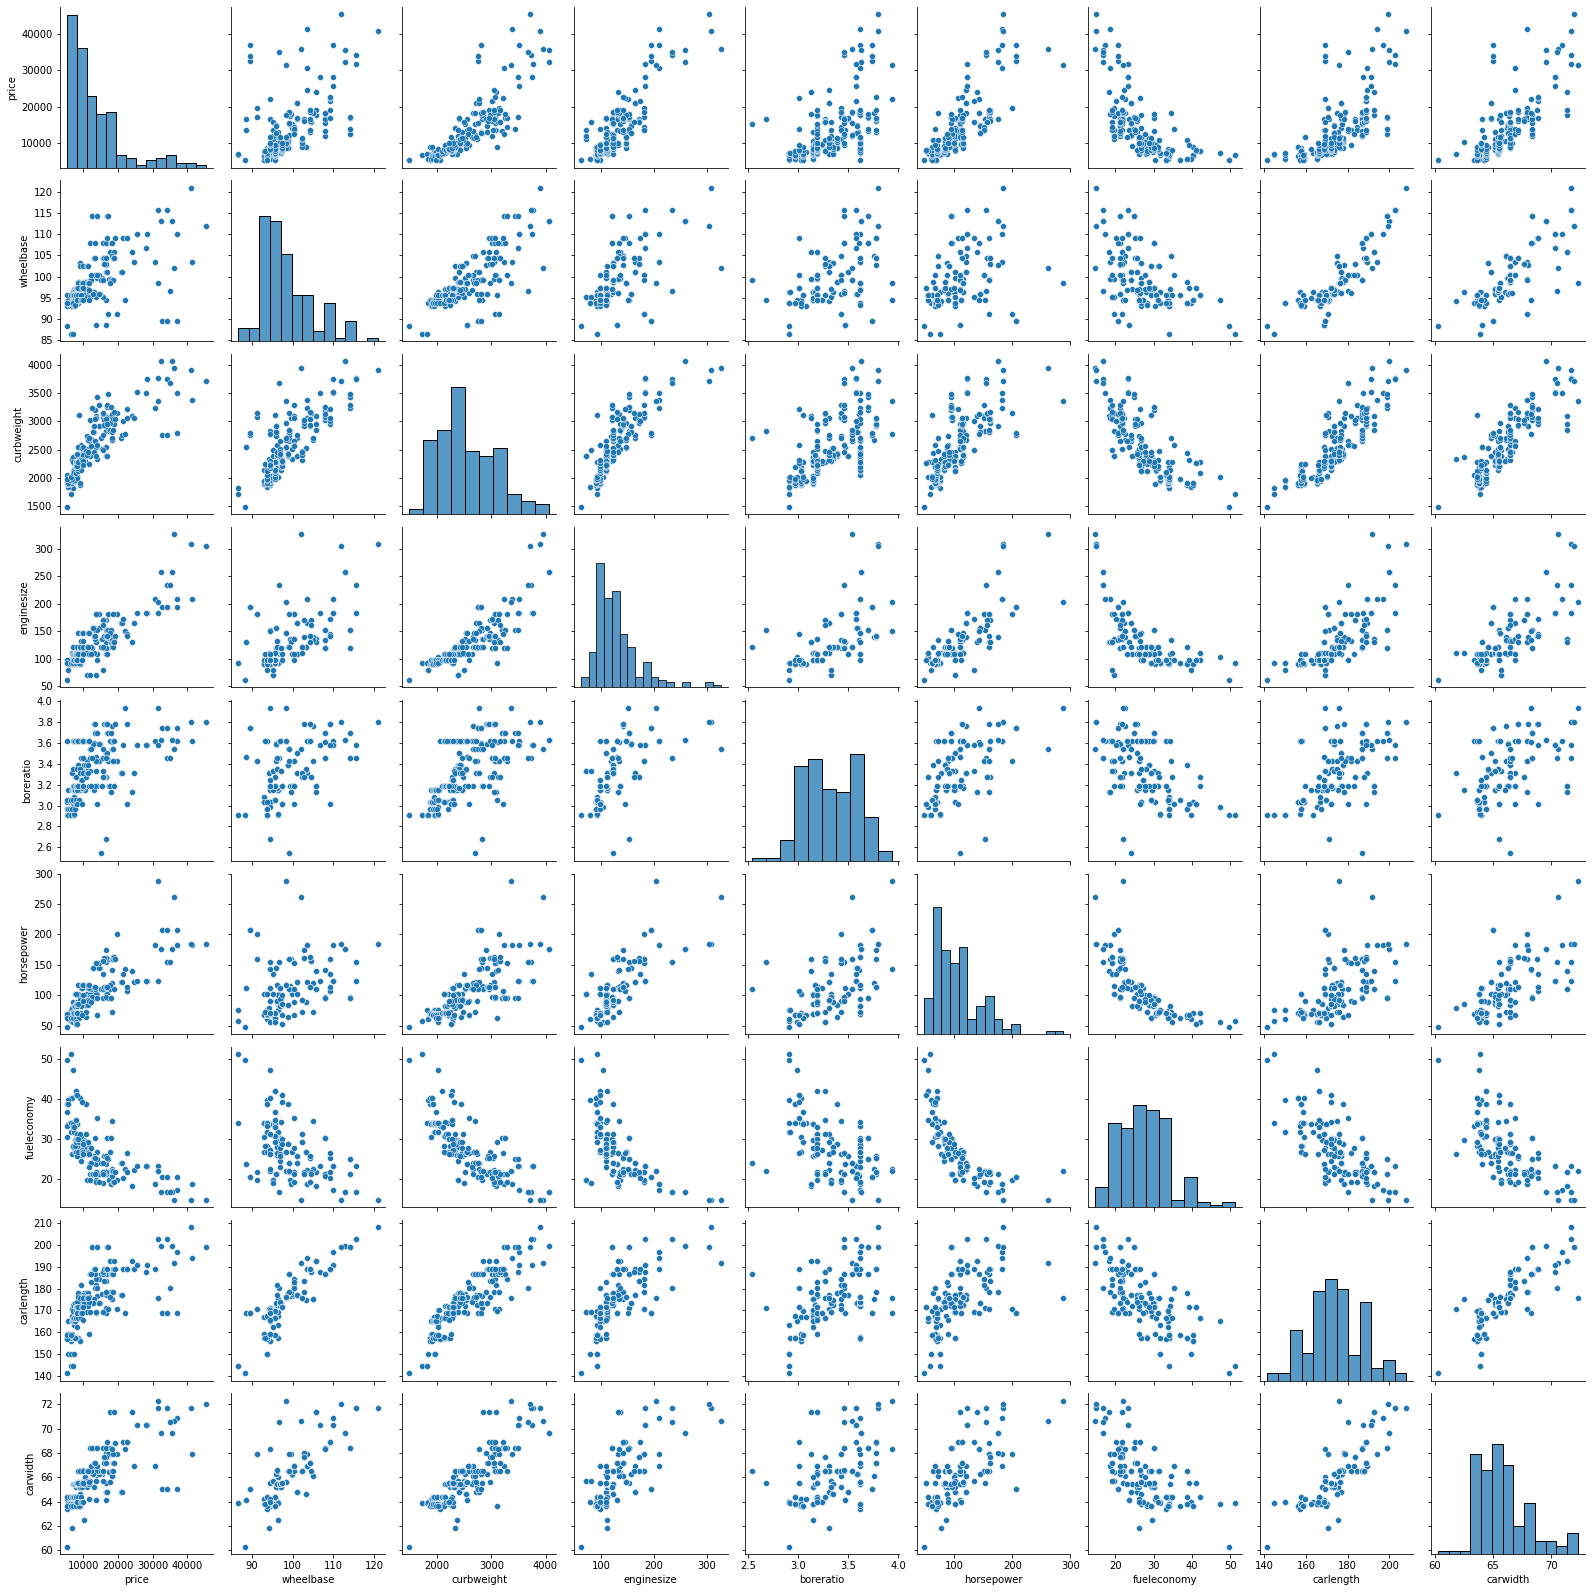

In [17]:
sns.pairplot(cars_lr)
plt.show()

### Step 6 : Dummy Variables (biến giả)

In [18]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [19]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [20]:
cars_lr.shape

(205, 31)